In [1]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
print(pd.__version__)
import matplotlib.pyplot as plt
import progressbar
import scipy

1.2.0


## Print Dependencies



Dependences are fundamental to record the computational environment.

In [2]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py,progressbar,scipy

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.19.0

pandas     : 1.2.0
keras      : 2.4.3
numpy      : 1.19.5
math       : unknown
tensorflow : 2.4.0
matplotlib : 3.3.3
h5py       : 2.10.0
progressbar: 2.5
scipy      : 1.6.0

Compiler    : GCC 5.4.0 20160609
OS          : Linux
Release     : 5.8.0-40-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

 
Last updated: Thu Jan 28 2021 11:47:32CET



## Load of the data

In [35]:
from process import loaddata
regr_data = loaddata("../data/regression/250.csv")
class_data = loaddata("../data/classifier/250.csv")

In [36]:
np.random.shuffle(regr_data)
y = regr_data[:,-3:]
x = regr_data[:,:6]

In [37]:
np.random.shuffle(class_data)
yc = class_data[:,0]
xc = class_data[:,1:]

In [38]:
train_split = 0.75
train_limit = int(len(y)*train_split)
print("Training sample: {0} \nValuation sample: {1}".format(train_limit, len(y)-train_limit))

Training sample: 125414 
Valuation sample: 41805


In [39]:
x_train = x[:train_limit]
x_val = x[train_limit:]

y_train = y[:train_limit]
y_val = y[train_limit:]

## Model Build

In [40]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers
from keras import regularizers

## !! 
The dropout 0.2 seems to work better

In [41]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (12, kernel_initializer= "normal" , input_shape = x.shape))
    model.add (layers.Dense (32, activation = "relu"))
    model.add (layers.Dense (64, activation = "relu"))
    model.add (layers.Dense (128, activation = "relu"))
    model.add (layers.Dense (128, activation = "relu"))
    model.add (layers.Dense (64, activation = "relu"))
    model.add (layers.Dense (32, activation = "relu"))
    model.add (layers.Dense (12, activation = "relu"))
    model.add (layers.Dense (3))
    model.compile(optimizer = "rmsprop" , loss = "mse" , metrics =["mae"])
    return model

In [42]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 20, batch_size = 50, validation_data = (x_val, y_val) )
model.save("../models/regression/large_mse250.h5")

Epoch 1/20
2509/2509 [==============================] - 6s 2ms/step - loss: 3.3404e-04 - mae: 0.0123 - val_loss: 3.3155e-05 - val_mae: 0.0051
Epoch 2/20
2509/2509 [==============================] - 4s 2ms/step - loss: 2.5681e-05 - mae: 0.0041 - val_loss: 2.0366e-05 - val_mae: 0.0037
Epoch 3/20
2509/2509 [==============================] - 4s 2ms/step - loss: 1.6344e-05 - mae: 0.0033 - val_loss: 2.1219e-05 - val_mae: 0.0035
Epoch 4/20
2509/2509 [==============================] - 4s 2ms/step - loss: 1.2761e-05 - mae: 0.0029 - val_loss: 8.8179e-06 - val_mae: 0.0025
Epoch 5/20
2509/2509 [==============================] - 4s 2ms/step - loss: 1.0734e-05 - mae: 0.0026 - val_loss: 6.1919e-06 - val_mae: 0.0020
Epoch 6/20
2509/2509 [==============================] - 4s 2ms/step - loss: 9.3521e-06 - mae: 0.0025 - val_loss: 6.4026e-06 - val_mae: 0.0020
Epoch 7/20
2509/2509 [==============================] - 4s 2ms/step - loss: 8.3994e-06 - mae: 0.0023 - val_loss: 4.8085e-06 - val_mae: 0.0018
Epoch 

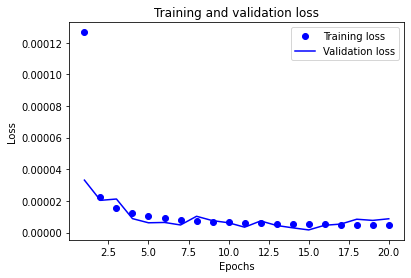

In [43]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Test spectrum

In [44]:
from tensorflow import keras
model_regr = keras.models.load_model('../models/regression/large_mse250.h5')
model_class = keras.models.load_model('../models/classifier/with-dropout-250.h5')

In [45]:
model_regr.summary()
model_class.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 167219, 12)        84        
_________________________________________________________________
dense_19 (Dense)             (None, 167219, 32)        416       
_________________________________________________________________
dense_20 (Dense)             (None, 167219, 64)        2112      
_________________________________________________________________
dense_21 (Dense)             (None, 167219, 128)       8320      
_________________________________________________________________
dense_22 (Dense)             (None, 167219, 128)       16512     
_________________________________________________________________
dense_23 (Dense)             (None, 167219, 64)        8256      
_________________________________________________________________
dense_24 (Dense)             (None, 167219, 32)       

In [46]:
def energy_spectrum(energy_array, bins):
    energy_array = np.array(energy_array)
    plt.hist(energy_array, bins, histtype=u'step', density=True)
    plt.yscale("log")
    plt.show()

In [47]:
final_p = []
final_e = []

for regr_pair in regr_data:
    final_e.append(np.linalg.norm(regr_pair[10:13]))
    final_p.append(np.linalg.norm(regr_pair[13:16]))

In [58]:
from tensorflow import keras 
photon_final_nn = []
threshold = 0.5
num = int(1*len(xc))
bar = progressbar.ProgressBar(maxval=num, 
                              widgets=[progressbar.Bar('=', '[', ']'), ' ', 
                                       progressbar.Percentage(), 
                                       " of {0}".format(num)])
bar.start()
for i, x_ in enumerate(xc[:num]):
    x_ = np.array([x_])
    classification = model_class.predict(np.stack(x_))
    if classification >= threshold:
        regr_x = np.array([x_[0,:6]])
        regr_result = model_regr.predict(regr_x)
        photon_final_nn.append(np.linalg.norm(regr_result[0]))
    bar.update(i+1)
bar.finish()

[==============================================================] 100% of 334438


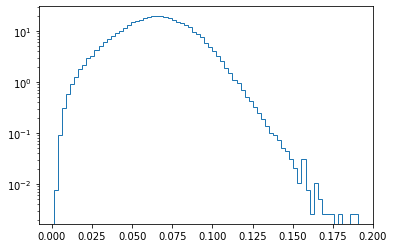

In [59]:
energy_spectrum(photon_final_nn, 75)

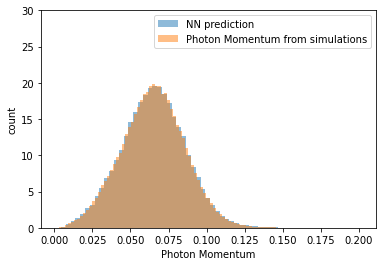

In [60]:
plt.hist(photon_final_nn, 60, alpha=0.5, label='NN prediction', density = True)
plt.hist(final_p, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
plt.xlabel('Photon Momentum')
plt.ylabel('count')
plt.legend(loc='upper right')
#plt.xlim((0, 0.25))
plt.ylim((0, 30))
plt.show()

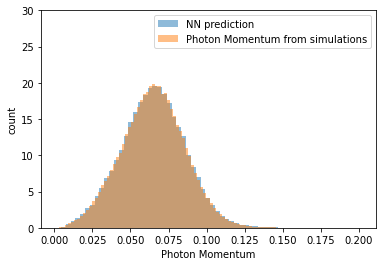

In [61]:
plt.hist(photon_final_nn, 60, alpha=0.5, label='NN prediction', density = True)
plt.hist(final_p, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
plt.xlabel('Photon Momentum')
plt.ylabel('count')
plt.legend(loc='upper right')
#plt.xlim((0, 0.25))
plt.ylim((0, 30))
plt.show()

In [62]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chisquare

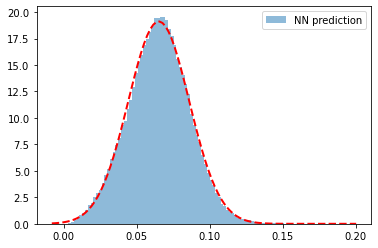

In [63]:
mean_nn,std_nn=norm.fit(photon_final_nn)
plt.hist(photon_final_nn, bins=100, alpha = 0.5, label='NN prediction', density = True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean_nn, std_nn)
plt.plot(x, y,'r--', linewidth=2)
plt.legend(loc='upper right')
plt.show()

In [64]:
print('mean = ', mean_nn)
print('std = ', std_nn)
print("chi square = ", stats.chisquare(photon_final_nn))

mean =  0.0650474
std =  0.0208735
chi square =  Power_divergenceResult(statistic=1024.0334321143548, pvalue=1.0)


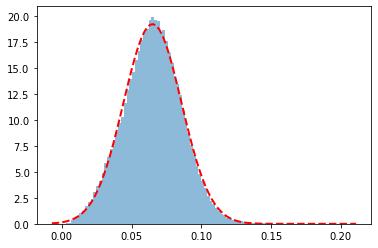

In [65]:
mean_p,std_p=norm.fit(final_p)
plt.hist(final_p, bins=100, alpha = 0.5, label='Photon Momentum from simulations', density = True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean_p, std_p)
plt.plot(x, y,'r--', linewidth=2)
plt.show()

In [66]:
print('mean = ', mean_p)
print('std = ', std_p)
print("chi square = ", stats.chisquare(photon_final_nn))

mean =  0.06500765839861221
std =  0.020780362624671832
chi square =  Power_divergenceResult(statistic=1024.0334321143548, pvalue=1.0)


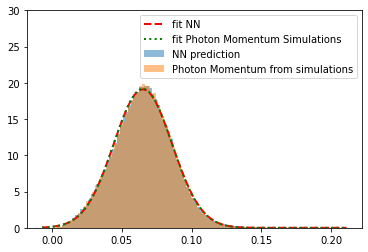

In [67]:
plt.hist(photon_final_nn, bins=100, alpha = 0.5, label='NN prediction', density = True)
plt.hist(final_p, bins=100, alpha = 0.5, label='Photon Momentum from simulations', density = True)
x_nn = np.linspace(xmin, xmax, 100)
y_nn = norm.pdf(x_nn, mean_nn, std_nn)
plt.plot(x_nn, y_nn,'r--', label = 'fit NN', linewidth=2)
plt.legend(loc='upper right')
x_p = np.linspace(xmin, xmax, 100)
y_p = norm.pdf(x_p, mean_p, std_p)
plt.plot(x_p, y_p, 'g:', label = 'fit Photon Momentum Simulations', linewidth=2)
plt.legend(loc='upper right')
plt.ylim((0, 30))
plt.show()

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


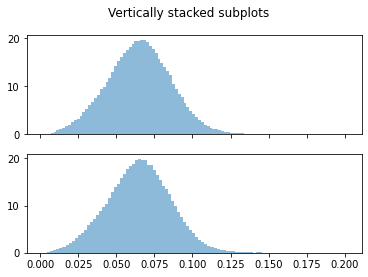

In [68]:
fig, axs = plt.subplots(2, sharex = True)
fig.suptitle('Vertically stacked subplots')
axs[0].hist(photon_final_nn, 100, alpha=0.5, label='NN prediction', density = True)
axs[1].hist(final_p, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
fig.show()